In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading Data

In [41]:
data = pd.read_csv('/content/car_age_price.csv')
data.head()    

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


Correlation

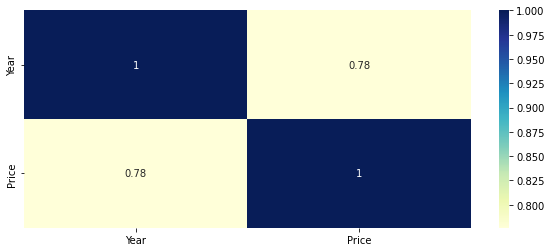

In [42]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,cmap='YlGnBu')

In [43]:
data.columns

Index(['Year', 'Price'], dtype='object')

Fitting best linear relation b/w year and price

In [44]:
x = data.drop(['Price'],axis=1)
y = data['Price']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#Training data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
#Linear Regression model
lr = LinearRegression()
model = lr.fit(x_train,y_train)
predictions = model.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error
print('MSE =',mean_squared_error(y_test,predictions))

MSE = 4326906256.829671


In [50]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y_test,predictions))

R squared value is : 0.36759313425902185


Predicting price for the year 2022

In [51]:
predict_2022 = model.predict([[2022]])
pred_2022 = predict_2022[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [52]:
print('Predicted value for 2022 model 2nd hand Hyundai i10 is Rs.',pred_2022.round())

Predicted value for 2022 model 2nd hand Hyundai i10 is Rs. 743602.0


Lasso Regression

In [53]:
from sklearn.linear_model import Lasso

In [54]:
lasso = Lasso(alpha=1.0)

In [55]:
x1 = data.drop(['Price'],axis=1)
y1 = data['Price']

In [56]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [57]:
m1 = lasso.fit(x1_train, y1_train)

In [58]:
lasso.score(x1_test, y1_test), lasso.score(x1_train, y1_train)

(0.3675999284778446, 0.6389354253276789)

In [59]:
lasso.coef_

array([47608.1555995])

In [60]:
prediction_lasso = m1.predict(x1_test)

In [61]:
print('MSE =',mean_squared_error(y1_test,prediction_lasso))

MSE = 4326859771.015669


In [62]:
from sklearn.metrics import r2_score
print('R squared value is :', r2_score(y1_test,prediction_lasso))

R squared value is : 0.3675999284778446


Comparing Linear and Lasso Regression

In [63]:
compare_df = pd.DataFrame({'Mean Squared Error':[mean_squared_error(y_test,predictions),mean_squared_error(y1_test,prediction_lasso)],
                           'R2 value':[r2_score(y_test,predictions),r2_score(y1_test,prediction_lasso)]},index=['Linear Regression','Lasso Regression'])
compare_df

,Mean Squared Error,R2 value
Linear Regression,4.326906e+09,0.367593
Lasso Regression,4.326860e+09,0.367600
